-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b>S SUDHARSAN </b>

<b>Task - 03 Student Satisfaction Survey</b>

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This project analyzes student satisfaction survey data to identify strengths and areas for improvement in teaching and mentorship. Survey responses are explored to highlight trends in faculty performance, student engagement, and overall academic experience.

**Import required Python libraries for data analysis and visualization.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

**Download NLTK's VADER sentiment dictionary for sentiment analysis.**

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Win10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Load the CSV dataset and display the first 5 row**

In [3]:
data = pd.read_csv('Student_Satisfaction_Survey.csv',encoding='latin1')
print(data.head())

   SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12   
2   3                     1                12   
3   4                     1                12   
4   5                     1                12   

                                           Questions  Weightage 1  \
0  How much of the syllabus was covered in the cl...            0   
1  How well did the teachers prepare for the clas...            0   
2    How well were the teachers able to communicate?            0   
3  The teachers approach to teaching can best be...            0   
4  Fairness of the internal evaluation process by...            0   

   Weightage 2  Weightage 3  Weightage 4  Weightage 5 Average/ Percentage  \
0            0            1            0            0        3.00 / 60.00   
1            0            0            0            1       5.00 / 100.00   
2            0            0            0            1      

In [4]:
print(data.tail())

     SN  Total Feedback Given  Total Configured  \
575  16                     9               170   
576  17                     9               170   
577  18                     9               170   
578  19                     9               170   
579  20                     9               170   

                                             Questions  Weightage 1  \
575  The institute/ teachers use student-centric me...            1   
576  Teachers encourage you to participate in extra...            0   
577  Efforts are made by the institute/ teachers to...            0   
578  What percentage of teachers use ICT tools such...            0   
579  The overall quality of the teaching-learning p...            0   

     Weightage 2  Weightage 3  Weightage 4  Weightage 5 Average/ Percentage  \
575            0            0            2            6        4.33 / 86.67   
576            0            0            3            6        4.67 / 93.33   
577            0            1

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB
None


**Extract columns representing survey ratings and show sample values**

In [6]:
rating_columns = ['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']
ratings_data = data[rating_columns]
print(ratings_data.head())

   Weightage 1  Weightage 2  Weightage 3  Weightage 4  Weightage 5
0            0            0            1            0            0
1            0            0            0            0            1
2            0            0            0            0            1
3            0            0            1            0            0
4            0            0            0            1            0


**Convert average rating text to numeric values for quantitative analysis.**

In [7]:
data['Average Rating'] = data['Average/ Percentage'].apply(lambda x: float(str(x).split(' / ')[0]))
print(data[['Average/ Percentage', 'Average Rating']].head())

  Average/ Percentage  Average Rating
0        3.00 / 60.00             3.0
1       5.00 / 100.00             5.0
2       5.00 / 100.00             5.0
3        3.00 / 60.00             3.0
4        4.00 / 80.00             4.0


**The distribution of average ratings reveals the overall satisfaction pattern among students.**

In [8]:
data['Average Rating'] = data['Average/ Percentage'].apply(lambda x: float(str(x).split(' / ')[0]))
print(data[['Average/ Percentage', 'Average Rating']].head())

  Average/ Percentage  Average Rating
0        3.00 / 60.00             3.0
1       5.00 / 100.00             5.0
2       5.00 / 100.00             5.0
3        3.00 / 60.00             3.0
4        4.00 / 80.00             4.0


**Validate the presence of feedback text to prepare for sentiment analysis**

In [9]:
data['Average Rating'] = data['Average/ Percentage'].apply(lambda x: float(str(x).split(' / ')[0]))

**Define a sentiment analysis function leveraging VADER to classify feedback into positive, neutral, or negative.**

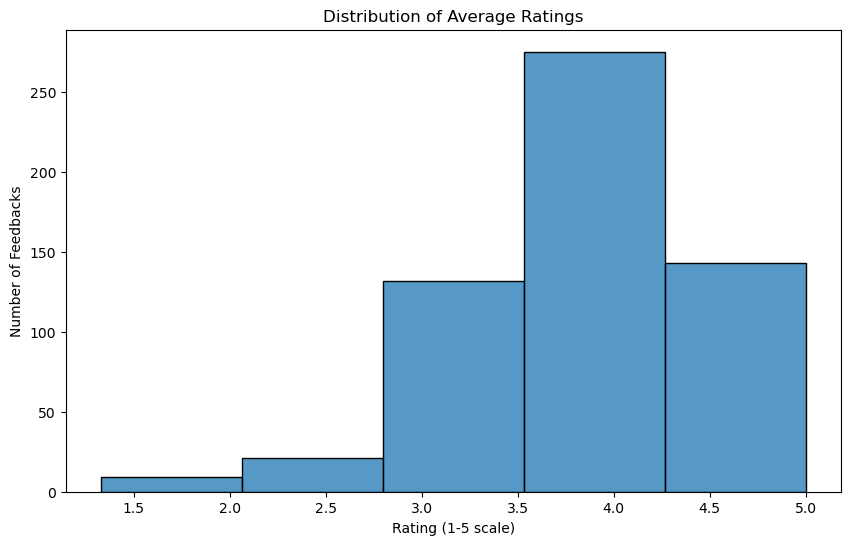

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data['Average Rating'], bins=5, kde=False)
plt.title('Distribution of Average Ratings')
plt.xlabel('Rating (1-5 scale)')
plt.ylabel('Number of Feedbacks')
plt.show()

**Annotate the dataset with sentiment labels based on analyzed feedback.**

In [11]:
if 'Questions' in data.columns and data['Questions'].dtype == 'object':
    comments = data['Questions'].dropna().astype(str)
    print(f"Number of feedback questions for analysis: {len(comments)}")
else:
    print("The 'Questions' column was not found or is not suitable for text analysis. Please replace 'Questions' with the actual text feedback column name.")
    comments = pd.Series() 

Number of feedback questions for analysis: 580


**Visualize the sentiment distribution to understand the balance of opinions in feedback.**

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(feedback):
    score = sia.polarity_scores(feedback)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

**Highlight questions with low average ratings to identify areas needing improvement.**

In [13]:
data['Sentiment'] = comments.apply(analyze_sentiment)

**Display average ratings per question to compare detailed performance across survey items**

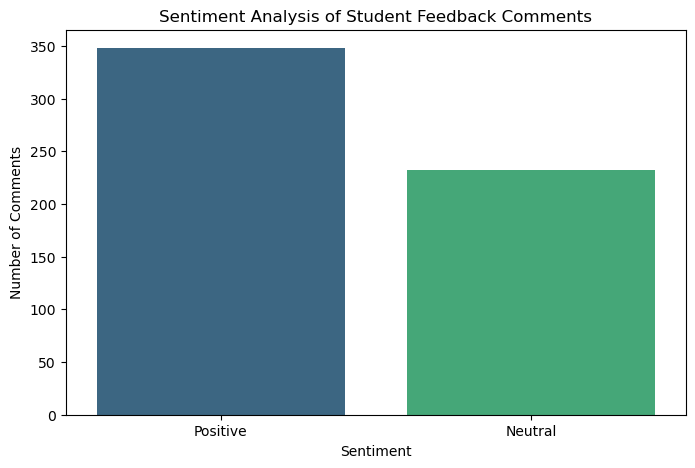

In [14]:
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(
    x=sentiment_counts.index, 
    y=sentiment_counts.values, 
    hue=sentiment_counts.index, 
    palette='viridis', 
    legend=False
)
plt.title('Sentiment Analysis of Student Feedback Comments')
plt.ylabel('Number of Comments')
plt.show()

**Summarize total rating counts across questions to evaluate overall response trends.**

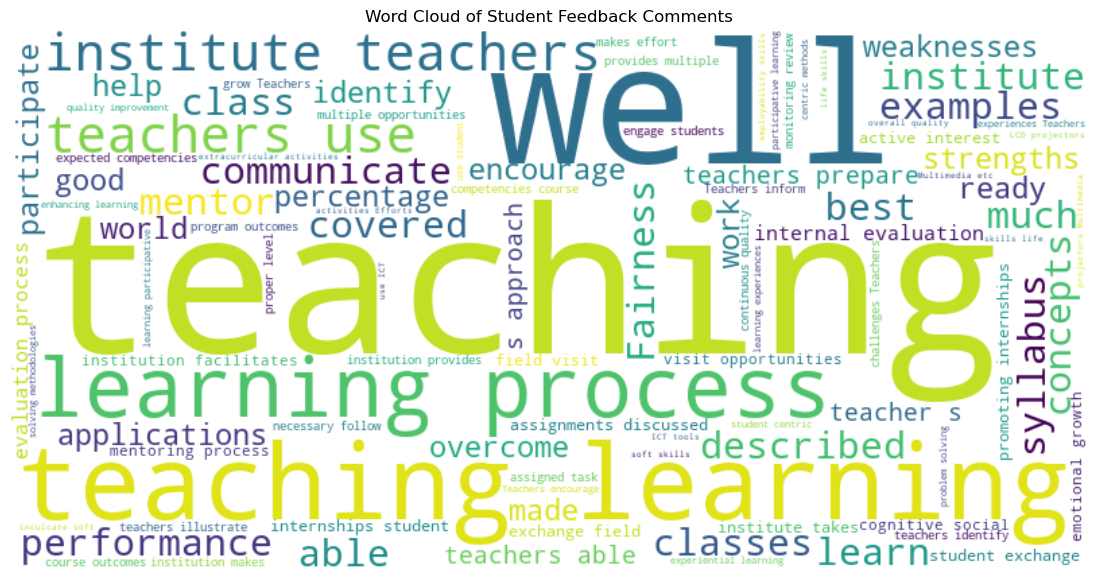

In [15]:
all_words = ' '.join(comments)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Student Feedback Comments')
plt.show()

**Analyze correlations between rating categories to uncover relationships among satisfaction measures.**

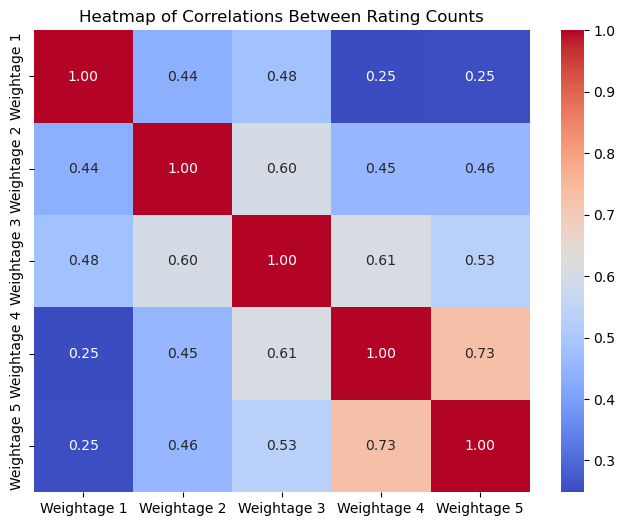

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(data[rating_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations Between Rating Counts')
plt.show()

**Identify questions with high positive sentiment concentration indicating strengths.**

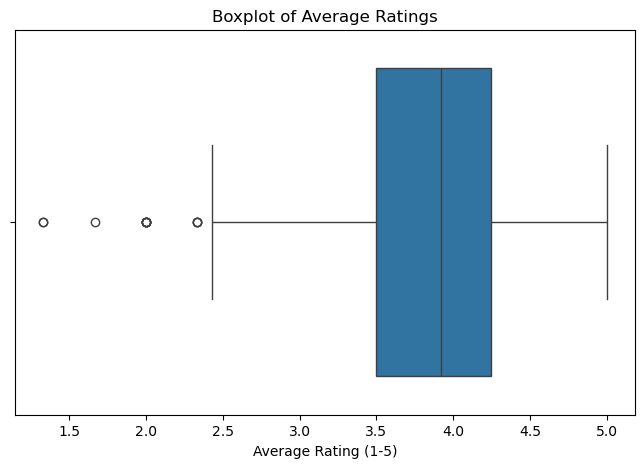

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Average Rating'])
plt.title('Boxplot of Average Ratings')
plt.xlabel('Average Rating (1-5)')
plt.show()

**Quantify neutral and negative sentiments and provide sample negative feedback examples for actionable insights**

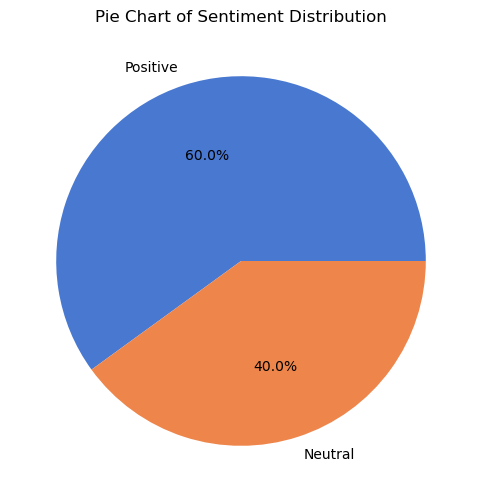

In [18]:
sentiment_counts = data['Sentiment'].value_counts() if 'Sentiment' in data.columns else None
if sentiment_counts is not None:
    plt.figure(figsize=(6,6))
    plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
    plt.title('Pie Chart of Sentiment Distribution')
    plt.show()

**Generate a word cloud to visualize common themes and keywords in student feedback**

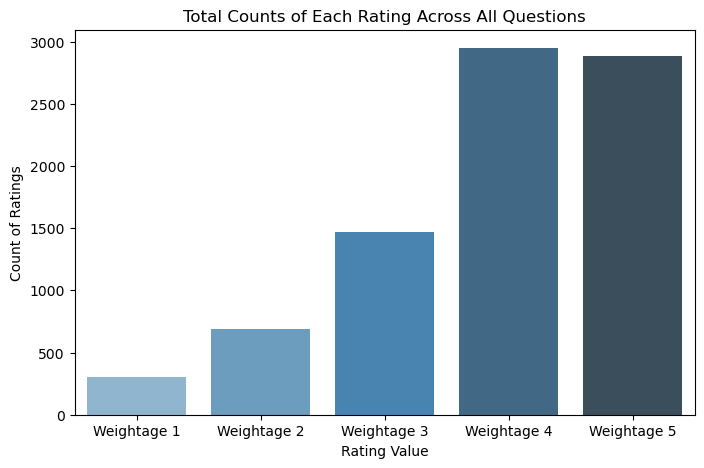

In [19]:
rating_counts_per_question = data[rating_columns].sum().reset_index()
rating_counts_per_question.columns = ['Rating', 'Count']
plt.figure(figsize=(8,5))
sns.barplot(
    x='Rating', 
    y='Count', 
    data=rating_counts_per_question, 
    hue='Rating', 
    palette='Blues_d', 
    legend=False
)
plt.title('Total Counts of Each Rating Across All Questions')
plt.ylabel('Count of Ratings')
plt.xlabel('Rating Value')
plt.show()

**Summarize descriptive statistics related to average ratings for overall evaluation**

C:\Users\Win10\AppData\Local\Temp\ipykernel_1984\1259840227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Questions', data=data.sort_values('Average Rating', ascending=False), palette='viridis')
D:\an\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


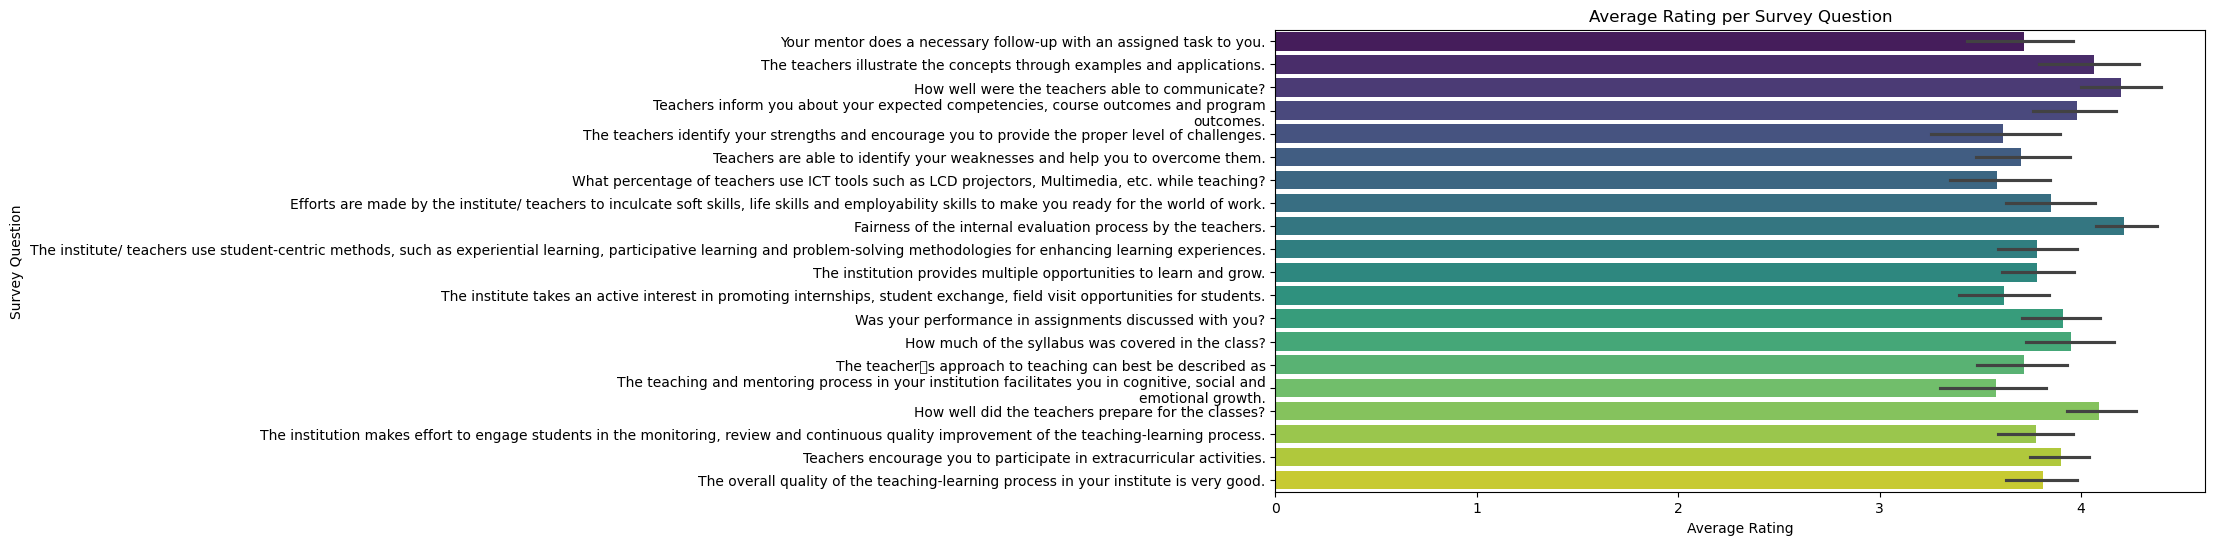

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Average Rating', y='Questions', data=data.sort_values('Average Rating', ascending=False), palette='viridis')
plt.title('Average Rating per Survey Question')
plt.xlabel('Average Rating')
plt.ylabel('Survey Question')
plt.show()

**Aggregate and compare ratings across different courses to spot variations in student satisfaction.**

In [21]:
low_scoring = data[data['Average Rating'] < 3.5][['Questions', 'Average Rating']]
print("Low-scoring categories/questions that need improvement:")
print(low_scoring)

Low-scoring categories/questions that need improvement:
                                             Questions  Average Rating
0    How much of the syllabus was covered in the cl...            3.00
3    The teachers approach to teaching can best be...            3.00
6    The institute takes an active interest in prom...            3.00
7    The teaching and mentoring process in your ins...            2.00
9    Teachers inform you about your expected compet...            3.00
..                                                 ...             ...
499  The overall quality of the teaching-learning p...            3.37
535  The institute/ teachers use student-centric me...            3.41
538  What percentage of teachers use ICT tools such...            3.26
550  Your mentor does a necessary follow-up with an...            2.00
558  What percentage of teachers use ICT tools such...            3.00

[138 rows x 2 columns]


**Save the processed and enriched survey data for future reference and reporting.**

In [22]:
if 'Sentiment' in data.columns and 'Questions' in data.columns:
    sentiment_summary = data.groupby(['Questions', 'Sentiment']).size().unstack(fill_value=0)
    sentiment_summary['Positive %'] = sentiment_summary.get('Positive', 0) / sentiment_summary.sum(axis=1) * 100
    positive_areas = sentiment_summary[sentiment_summary['Positive %'] > 60]  # Threshold can be adjusted
    print("\nCategories/questions with positive sentiment (over 60% positive comments):")
    print(positive_areas[['Positive %']])


Categories/questions with positive sentiment (over 60% positive comments):
Sentiment                                           Positive %
Questions                                                     
Efforts are made by the institute/ teachers to ...       100.0
How well did the teachers prepare for the classes?       100.0
How well were the teachers able to communicate?          100.0
Teachers are able to identify your weaknesses a...       100.0
Teachers encourage you to participate in extrac...       100.0
The institute takes an active interest in promo...       100.0
The institution makes effort to engage students...       100.0
The institution provides multiple opportunities...       100.0
The overall quality of the teaching-learning pr...       100.0
The teachers identify your strengths and encour...       100.0
The teachers approach to teaching can best be ...       100.0
The teaching and mentoring process in your inst...       100.0


**Review a sample of exported data to ensure integrity and completeness before delivery.**

In [23]:
if 'Sentiment' in data.columns:
    neutral_neg_counts = data[data['Sentiment'].isin(['Neutral', 'Negative'])].groupby('Sentiment').size()
    print("\nCounts of Neutral and Negative comments to address:")
    print(neutral_neg_counts)
    if 'Comments' in data.columns:
        negative_comments = data[data['Sentiment'] == 'Negative']['Comments'].head(5)
        print("\nSample negative feedback comments:")
        print(negative_comments.to_list())


Counts of Neutral and Negative comments to address:
Sentiment
Neutral    232
dtype: int64


**This project looks at student feedback to see what’s working well in teaching and where things can get better. It helps find ways to improve the learning experience based on what students say.**

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------